# Activity: Build a K-means model 

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling. 

## **Step 1: Imports** 


Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [1]:
# Import standard operational packages.
import pandas as pd
import numpy as np

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import seaborn as sns
import matplotlib.pyplot as plt
### YOUR CODE HERE ###

`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Save the `pandas` DataFrame in variable `penguins`. 

### YOUR CODE HERE ###

penguins = pd.read_csv("penguins.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `load_dataset` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The function is from seaborn (`sns`). It should be passed in the dataset name `'penguins'` as a string. 

</details>

Now, review the first 10 rows of data.


In [3]:
# Review the first 10 rows.

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

By default, the method only returns five rows. To change this, specify how many rows `(n = )` you want.

</details>

## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [4]:
# Find out how many penguin types there are.
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `unique()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `unique()` method on the column `'species'`.

</details>

In [5]:
# Find the count of each species type.
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `value_counts()` method.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `value_counts()` method on the column `'species'`.

</details>

**Question:** How many types of species are present in the dataset?

A: There are 3 types of species: Adelie, Gentoo, and Chinstrap.

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when you already know how many penguin species the dataset contains?

A: When it comes to selecting the number of clusters for K-means, it is important to choose the correct value for the variable k because where the model may converge to the ideal centroid position may be dependent on the value of k assigned. Furthermore, if the value of k is selected differently from the number of penguin species, then the clusters may appear unintuitive and not optimized effectively.

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data. 

In [6]:
# Check for missing values.
penguins.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `isnull` and `sum` methods. 

</details>

Now, drop the rows with missing values and save the resulting pandas DataFrame in a variable named `penguins_subset`.

In [7]:
# Drop rows with missing values.
# Save DataFrame in variable `penguins_subset`.
penguins_subset = penguins.dropna(axis=0)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `dropna`. Note that an axis parameter passed in to this function should be set to 0 if you want to drop rows containing missing values or 1 if you want to drop columns containing missing values. Optionally, `reset_index` may also be used to avoid a SettingWithCopy warning later in the notebook. 
</details>

Next, check to make sure that `penguins_subset` does not contain any missing values.

In [8]:
# Check for missing values.
penguins_subset.isna().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

Now, review the first 10 rows of the subset.

In [9]:
# View first 10 rows.
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS. 


In [10]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [11]:
# Convert `sex` column from categorical to numeric.
penguins_subset = pd.get_dummies(penguins_subset, drop_first=True, columns=['sex'])
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,1
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,0
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,1
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `get_dummies` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `drop_first` parameter should be set to `True`. This removes redundant data. The `columns` parameter can **optionally** be set to `['sex']` to specify that only the `'sex'` column gets this operation performed on it. 

</details>

### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later. 

In [12]:
# Drop the island column.
penguins_subset = penguins_subset.drop(columns=['island'])
penguins_subset.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
4,Adelie,36.7,19.3,193.0,3450.0,0
5,Adelie,39.3,20.6,190.0,3650.0,1
6,Adelie,38.9,17.8,181.0,3625.0,0
7,Adelie,39.2,19.6,195.0,4675.0,1
12,Adelie,41.1,17.6,182.0,3200.0,0
13,Adelie,38.6,21.2,191.0,3800.0,1
14,Adelie,34.6,21.1,198.0,4400.0,1


### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 

First, copy all the features except the `'species'` column to a DataFrame `X`. 

In [13]:
# Exclude `species` variable from X
X = penguins_subset.copy()
X = X.drop(columns=['species'])
X.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
6,38.9,17.8,181.0,3625.0,0
7,39.2,19.6,195.0,4675.0,1
12,41.1,17.6,182.0,3200.0,0
13,38.6,21.2,191.0,3800.0,1
14,34.6,21.1,198.0,4400.0,1


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use`drop()`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Select all columns except `'species'.`The `axis` parameter passed in to this method should be set to `1` if you want to drop columns.
</details>

Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [14]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478,  0.99103121],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618, -1.00904996],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 , -1.00904996],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927,  0.99103121],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466, -1.00904996],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906,  0.99103121]])

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Instantiate StandardScaler to transform the data in a single step.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `.fit_transform()` method and pass in the data as an argument.
</details>

## **Step 3: Data modeling** 

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [15]:
# Fit K-means and evaluate inertia for different values of k.
def kmeans_inertia(num_clusters, x_vals):
    inertia = []
    for this_num in num_clusters:
        kmeans = KMeans(n_clusters=this_num, random_state=42)
        kmeans.fit(x_vals)
        inertia.append(kmeans.inertia_)
    
    return inertia

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [16]:
# Return a list of inertia for k=2 to 10.
num_clusters = [i for i in range(2, 11)]
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.6224143652249,
 578.8284278107235,
 386.14534424773285,
 284.5464837898288,
 217.92858573807678,
 201.39287843423264,
 186.82270634899209,
 173.47283154242746,
 164.55854201979943]

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the material about the `kmeans_inertia` function. 
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship. 

Text(0, 0.5, 'Inertia')

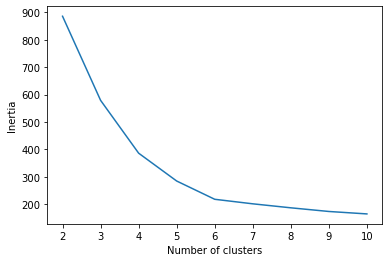

In [17]:
# Create a line plot.
linePlot = sns.lineplot(x=num_clusters, y=inertia)
linePlot.set_xlabel("Number of clusters")
linePlot.set_ylabel("Inertia")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=inertia`.
</details>

**Question:** Where is the elbow in the plot?

A: The elbow in the plot appears after 6 clusters.

## **Step 4: Results and evaluation** 

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [18]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    silhouette_list = []
    for this_num in num_clusters:
        kmeans = KMeans(n_clusters=this_num, random_state=42)
        kmeans.fit(x_vals)
        silhouette_list.append(silhouette_score(x_vals, kmeans.labels_))
    
    return silhouette_list

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review the `kmeans_sil` function video.
</details>

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship. 

Text(0, 0.5, 'Silhouette Score')

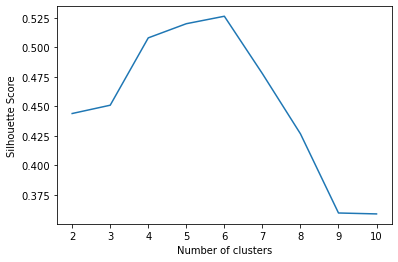

In [19]:
# Create a line plot.
sil_score = kmeans_sil(num_clusters, X_scaled)
linePlot = sns.lineplot(x=num_clusters, y=sil_score)
linePlot.set_xlabel("Number of clusters")
linePlot.set_ylabel("Silhouette Score")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `sns.lineplot`.
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Include `x=num_clusters` and `y=sil_score`.
</details>

**Question:** What does the graph show?

A: The silhouette score appears to be at the highest point when the number of clusters is 6.

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset. 

In [20]:
# Fit a 6-cluster model.
kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Make an instance of the model with `num_clusters = 6` and use the `fit` function on `X_scaled`. 
</details>




Print out the unique labels of the fit model.

In [21]:
# Print unique labels.
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [22]:
# Create a new column `cluster`.
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,2
2,Adelie,40.3,18.0,195.0,3250.0,0,2
4,Adelie,36.7,19.3,193.0,3450.0,0,2
5,Adelie,39.3,20.6,190.0,3650.0,1,0
6,Adelie,38.9,17.8,181.0,3625.0,0,2
7,Adelie,39.2,19.6,195.0,4675.0,1,0
12,Adelie,41.1,17.6,182.0,3200.0,0,2
13,Adelie,38.6,21.2,191.0,3800.0,1,0
14,Adelie,34.6,21.1,198.0,4400.0,1,0


Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [23]:
# Verify if any `cluster` can be differentiated by `species`.
penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Adelie       71
1        Gentoo       58
2        Adelie       73
         Chinstrap     5
3        Gentoo       61
4        Adelie        2
         Chinstrap    34
5        Chinstrap    29
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster', 'species'])`. 

</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>


Use an aggregation function such as `size`.

</details>

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

**Note:** The code for the graph below is outside the scope of this lab. 

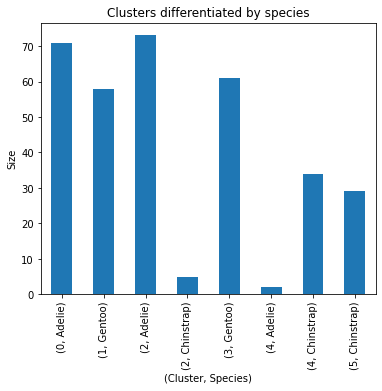

In [24]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [25]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.
penguins_subset.groupby(by=['cluster', 'species', 'sex_MALE']).size()

cluster  species    sex_MALE
0        Adelie     1           71
1        Gentoo     0           58
2        Adelie     0           73
         Chinstrap  0            5
3        Gentoo     1           61
4        Adelie     1            2
         Chinstrap  1           34
5        Chinstrap  0           29
dtype: int64

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `groupby(by=['cluster','species', 'sex_MALE'])`. 
</details>


<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use an aggregation function such as `size`.
</details>

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

A: The groupby function produced different clusters of penguins based on the species and sex.

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

**Note:** The code for the graph below is outside the scope of this lab. 

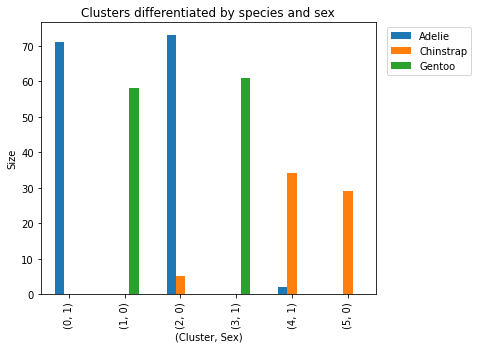

In [26]:
penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**


**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**

A: The key takeaways from this lab are using K-Means to cluster together unlabeled data to form groups based on the common patterns or traits that the data shares, using inertia and silhouette scores to measure the optimal values of the clusters, and using the elbow plots to determine which number of clusters is most optimal. In that case, the optimal number of clusters is 6, given with the difference in species and sex dimorphism.

**What summary would you provide to stakeholders?**

A: The K-Means algorithm is an effective method in grouping together unlabeled data and identifying patterns, such as the penguins dataset, and examples include the species and sex labels. That being said, based on the successful results obtained after clustering, other projects can follow this example on the clustering data and help enhance the understanding of unsupervised machine learning and why it remains effective in describing the data without any given labels or outputs.

### References

[Gorman, Kristen B., et al. “Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE, vol. 9, no. 3, Mar. 2014, p. e90081. PLoS Journals](https://doi.org/10.1371/journal.pone.0090081)

[Sklearn Preprocessing StandardScaler scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged